In [2]:
#Importing the required libraries

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import imageio

In [3]:
# Set path to dataset images

image_path='../Classification/ISL Datasets/Train-Test/data'

In [4]:
# Load folder into array-image_files and return the array 

def loadImages(path,label): 
  image_files=sorted([os.path.join(path,label,file)
   for file in os.listdir(path+str('/')+label) if file.endswith('.jpg')
  ])
  return image_files


In [5]:
# Function to display images

def display(img,title="Original"):
    plt.imshow(img,cmap='gray'),plt.title(title)
    plt.show()

In [50]:
# Preprocessing all the images to extract ROI i.e. hands

def preprocess_images(data,label):
    count=0
    for image in data[0:1]:
        
        #reading image
        img=imageio.imread(image)
        
        #Converting image to grayscale
        gray_img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        
        #Converting image to HSV format
        hsv_img=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
        
        #Defining boundary level for skin color in HSV
        skin_color_lower= np.array([0,40,30],np.uint8)
        skin_color_upper= np.array([43,255,255],np.uint8)
        
        #Producing mask
        skin_mask=cv2.inRange(hsv_img,skin_color_lower,skin_color_upper)
        
        #Removing Noise from mask
        skin_mask=cv2.medianBlur(skin_mask,5)
        skin_mask=cv2.addWeighted(skin_mask,0.5,skin_mask,0.5,0.0)
        
        #Applying Morphological operations
        kernel=np.ones((5,5),np.uint8)
        skin_mask=cv2.morphologyEx(skin_mask,cv2.MORPH_CLOSE,kernel)
        
        #Extracting hand by applying mask
        hand=cv2.bitwise_and(gray_img,gray_img,mask=skin_mask)
        
        #Get edges by Canny edge detection
        canny=cv2.Canny(hand,60,60)
        
        #save preprocessed images
        path=r'D:/'
        final_path=label+str('.jpg')
        print(final_path)
        cv2.imwrite(final_path,canny)
        count+=1

In [40]:
# Getting path to all images and preprocessing the images

signs=['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
for label in ['C']:
    images=[]
    images=loadImages(image_path,label)
    #preprocess_images(images,label)

In [41]:
image = images[0]

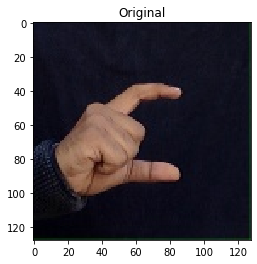

In [42]:
img=imageio.imread(image)
display(img)

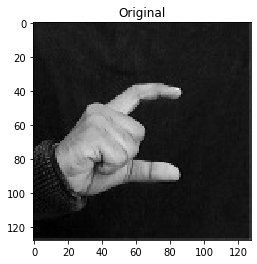

In [43]:
#Converting image to grayscale
gray_img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
display(gray_img)

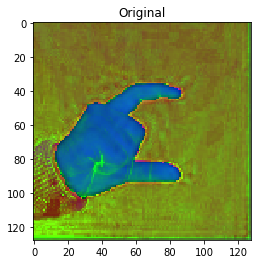

In [44]:
#Converting image to HSV format
hsv_img=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
display(hsv_img)

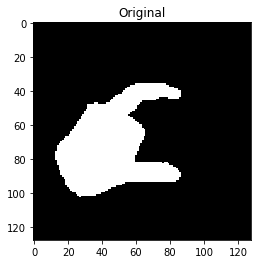

In [45]:
#Defining boundary level for skin color in HSV
skin_color_lower= np.array([0,40,30],np.uint8)
skin_color_upper= np.array([43,255,255],np.uint8)
#Producing mask
skin_mask=cv2.inRange(hsv_img,skin_color_lower,skin_color_upper)
display(skin_mask)

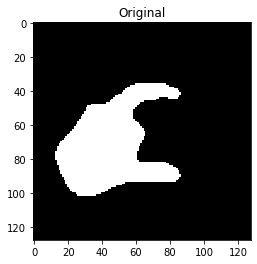

In [46]:
#Removing Noise from mask
skin_mask=cv2.medianBlur(skin_mask,5)
skin_mask=cv2.addWeighted(skin_mask,0.5,skin_mask,0.5,0.0)
        
#Applying Morphological operations
kernel=np.ones((5,5),np.uint8)
skin_mask=cv2.morphologyEx(skin_mask,cv2.MORPH_CLOSE,kernel)
display(skin_mask)

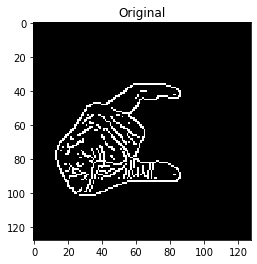

In [47]:
#Extracting hand by applying mask
hand=cv2.bitwise_and(gray_img,gray_img,mask=skin_mask)
        
#Get edges by Canny edge detection
canny=cv2.Canny(hand,60,60)
display(canny)

In [91]:
from PIL import Image

def create_collage(width, height, listofimages):
    cols = 6
    rows = 6
    thumbnail_width = width//cols
    thumbnail_height = height//rows
    
    size = thumbnail_width, thumbnail_height
    new_im = Image.new('RGB', (width, height))
    ims = []
    for p in listofimages:
        im = Image.open(p)
        im.thumbnail(size)
        ims.append(im)
    i = 0
    x = 0
    y = 0
    for col in range(cols):
        for row in range(rows):
            print(i, x, y)
            new_im.paste(ims[i], (x, y))
            i += 1
            y += thumbnail_height
        x += thumbnail_width
        y = 0

    new_im.save("Collage.jpg")

In [90]:
listofimages = ['0.jpg', '1.jpg','2.jpg','3.jpg','4.jpg','5.jpg','6.jpg','7.jpg','8.jpg','9.jpg','A.jpg','B.jpg','C.jpg','D.jpg','E.jpg','F.jpg','G.jpg','H.jpg','I.jpg','J.jpg','K.jpg','L.jpg','M.jpg','N.jpg','O.jpg','P.jpg','Q.jpg','R.jpg','S.jpg','T.jpg','U.jpg','V.jpg','W.jpg','X.jpg','Y.jpg','Z.jpg']
create_collage(1000, 1000, listofimages)

0 0 0
1 0 166


ValueError: cannot determine region size; use 4-item box